# 排序算法

十大常见的排序算法可以分为两大类：
- 比较类排序:通过比较来决定元素间的相对次序
- 非比较类排序:不通过比较来决定元素间的相对次序

<img src="http://github.com/lupanlpb/data_stru_and_algo/raw/master/images/排序算法1.png" width="500"/>

时间和空间复杂度以及稳定性：
- 时间复杂度:对排序数据总的操作次数。
- 空间复杂度:算法所需存储空间。
- 稳定性:相同值的元素在排序前后次序保持不变

<img src="http://github.com/lupanlpb/data_stru_and_algo/raw/master/images/排序算法2.png" width="800"/>

## 冒泡排序 (Bubble Sort)


冒泡排序是一种简单的排序算法。它重复地走访要排序的数列，一次比较两个元素，如果它们的顺序错误就把它们交换过来。走访数列的工作是重复地进行直到没有再需要交换，也就是说该数列已经排序完成。这个算法的名字由来是因为越小的元素会经由交换慢慢“浮”到数列的顶端。

<img src="http://github.com/lupanlpb/data_stru_and_algo/raw/master/images/冒泡排序.gif" width="600"/>

In [62]:
def bubbleSort(arr):
    n = len(arr) - 1
    for i in range(n):
        for j in range(n - i):
            if arr[j] >= arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                
arr = [2, 4, 3, 1, 9, 2, 5, 8, 1, 6]
bubbleSort(arr)
print(arr)

[1, 1, 2, 2, 3, 4, 5, 6, 8, 9]


In [58]:
# 短路冒泡排序
def shortBubbleSort(arr):
    '''
    swap 用来控制是否继续遍历比较，当发现 arr[i] > arr[i+1] 一直成立时，
    说明数组已经有序，因此不再进行遍历，排序完成，此时 swap 为 False。
    '''
    swap = True
    n = len(arr) - 1
    while 0 < n and swap:
        swap = False
        for i in range(n):
            if arr[i] > arr[i+1]:
                swap = True
                arr[i], arr[i+1] = arr[i+1], arr[i]
        n -= 1
        
arr = [2, 4, 3, 1, 9, 2, 5, 8, 1, 6]
shortBubbleSort(arr)
print(arr)

[1, 1, 2, 2, 3, 4, 5, 6, 8, 9]


## 选择排序 (Selection Sort)


选择排序是一种简单直观的排序算法。它的工作原理：首先在未排序序列中找到最小（大）元素，存放到排序序列的起始位置，然后，再从剩余未排序元素中继续寻找最小（大）元素，然后放到已排序序列的末尾。以此类推，直到所有元素均排序完毕。 

<img src="http://github.com/lupanlpb/data_stru_and_algo/raw/master/images/选择排序.gif" width="600"/>

In [56]:
def selectSort(arr):
    n = len(arr)
    for i in range(n-1):
        pos = i
        for j in range(i+1, n):
            if arr[pos] > arr[j]:
                pos = j
        arr[pos], arr[i] = arr[i], arr[pos]
        
arr = [2, 4, 3, 1, 9, 2, 5, 8, 1, 6]
selectSort(arr)
print(arr)      

[1, 1, 2, 2, 3, 4, 5, 6, 8, 9]


表现最稳定的排序算法之一，因为无论什么数据进去都是O(n2)的时间复杂度，所以用到它的时候，数据规模越小越好。唯一的好处可能就是不占用额外的内存空间了吧。理论上讲，选择排序可能也是平时排序一般人想到的最多的排序方法了吧。

## 插入排序 (Insertion-Sort)


插入排序的算法描述是一种简单直观的排序算法。它的工作原理是通过构建有序序列，对于未排序数据，在已排序序列中从后向前扫描，找到相应位置并插入。

<img src="http://github.com/lupanlpb/data_stru_and_algo/raw/master/images/插入排序.gif" width="600"/>

In [94]:
# 插入排序
def insertSort(arr):
    n = len(arr)
    for i in range(1, n):
        pos = i
        curr_value = arr[pos]
        while pos > 0 and curr_value < arr[pos-1]:
            arr[pos] = arr[pos-1]
            pos -= 1
        arr[pos] = curr_value
        
arr = [2, 4, 3, 1, 9, 2, 5, 8, 1, 6]
insertSort(arr)
print(arr)

[1, 1, 2, 2, 3, 4, 5, 6, 8, 9]


插入排序在实现上，通常采用in-place排序（即只需用到O(1)的额外空间的排序），因而在从后向前扫描过程中，需要反复把已排序元素逐步向后挪位，为最新元素提供插入空间。

## 快速排序 (Quick Sort)


快速排序的基本思想：通过一趟排序将待排记录分隔成独立的两部分，其中一部分记录的关键字均比另一部分的关键字小，则可分别对这两部分记录继续进行排序，以达到整个序列有序。

<img src="http://github.com/lupanlpb/data_stru_and_algo/raw/master/images/快速排序.gif" width="600"/>

In [63]:
# 快速排序
def quickSort(arr, left, right):
    '''
    两个指针一前一后，后面的指针遇到小于 pivot 的值停下来，前面的指针遇到大于 pivot 的值停下来，
    然后交换这两处的值，直到前后指针相遇。
    '''
    pl = left
    pr = right
    pivot = arr[left]
    while pl < pr:
        while pl < pr and pivot <= arr[pr]:
            pr -= 1
        if pl == pr:
            break
        else:
            arr[pl], arr[pr] = arr[pr], arr[pl]
            
        while pl < pr and pivot >= arr[pl]:
            pl += 1
        if pl == pr:
            break
        else:
            arr[pl], arr[pr] = arr[pr], arr[pl]
    
    # now pl == pr
    if left < pl-1:
        quickSort(arr, left, pl-1)
    if pr+1 < right:
        quickSort(arr, pr+1, right)
    
    
arr = [2, 4, 3, 1, 9, 2, 5, 8, 1, 6]
quickSort(arr, 0, len(arr)-1)
print(arr)

[1, 1, 2, 2, 3, 4, 5, 6, 8, 9]


In [74]:
# 快速排序
def quickSort(arr, left, right):
    if left < right:
        mid = partition(arr, left, right)
        quickSort(arr, left, mid-1)
        quickSort(arr, mid+1, right)
    else:
        return
    
def partition(arr, pl, pr):
    pivot = arr[pl]
    while pl < pr:
        while pl < pr and pivot <= arr[pr]:
            pr -= 1
        if pl == pr:
            break
        else:
            arr[pl], arr[pr] = arr[pr], arr[pl]
            
        while pl < pr and pivot >= arr[pl]:
            pl += 1
        if pl == pr:
            break
        else:
            arr[pl], arr[pr] = arr[pr], arr[pl]
    return pl
    
    
arr = [2, 4, 3, 1, 9, 2, 5, 8, 1, 6]
quickSort(arr, 0, len(arr)-1)
print(arr)

[1, 1, 2, 2, 3, 4, 5, 6, 8, 9]


In [75]:
# Python 版快排
def quickSort(arr):
    if len(arr) < 2:
        return arr
    else:
        pivot = arr[0]
        less = [ele for ele in arr[1:] if ele <= pivot]
        greater = [ele for ele in arr[1:] if ele > pivot]
        return quickSort(less) + [pivot] + quickSort(greater)

arr = [2, 4, 3, 1, 9, 2, 5, 8, 1, 6]
print(quickSort(arr))

[1, 1, 2, 2, 3, 4, 5, 6, 8, 9]


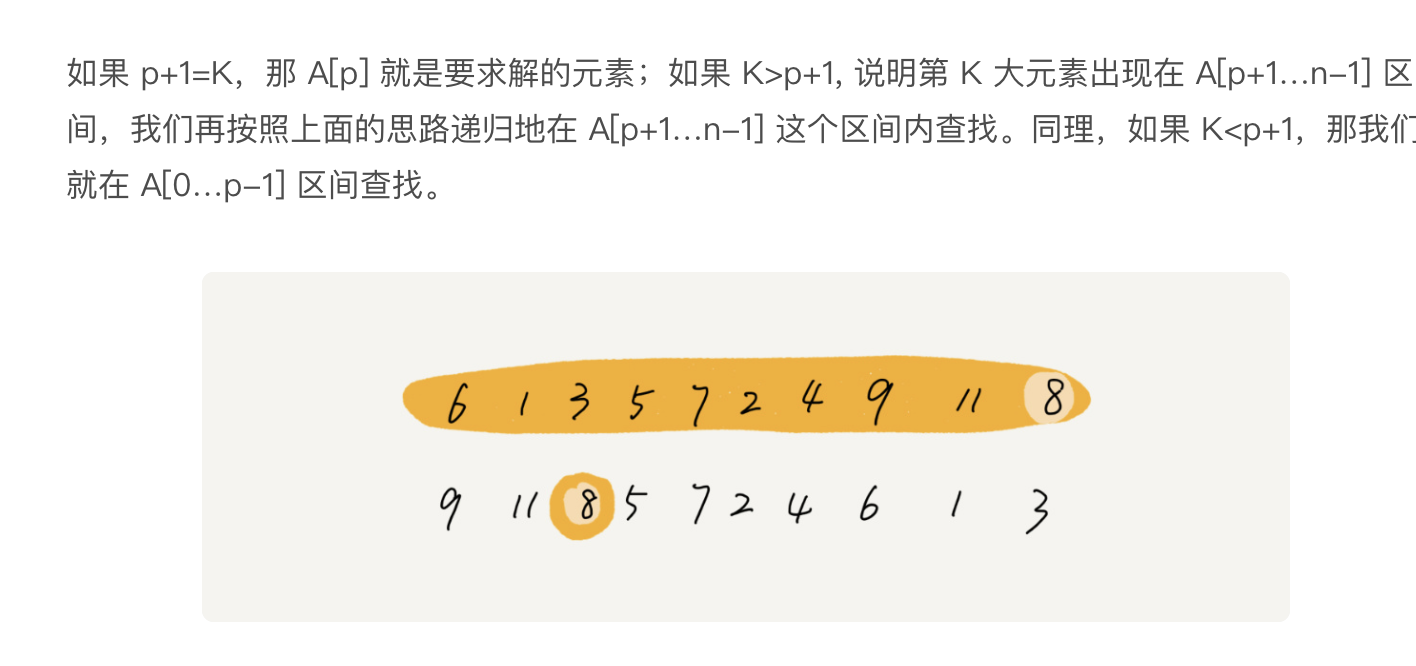

利用快速排序思想在 $O(n)$ 时间内查找第 K 大元素<font color=#dd00dd>(不包括重复元素)</font>：

从数组 arr 中随机找出一个元素 pivot，把数组分为三部分： arr[0:p] + arr[p] + arr[p+1:n]:
1. 如果 K = p + 1，那么第 K 大元素就是 arr[p]
2. 如果 K > p + 1，说明第 K 大元素在 arr[p+1:n] 范围内，我们就按照上面的思路进行递归查找
3. 反之，在 arr[0:p] 范围内递归查找

In [161]:
def findTopK(arr, k):
    n = len(arr)
    left = 0
    right = len(arr) - 1
    index = partition(arr, left, right)
    while index + 1 != k:
        if index + 1 >9:
            return 'The K is greater than the length of arr!'
        if index + 1 > k:
            index = partition(arr, left, index-1)
        else:
            index = partition(arr, index+1, right)
    return arr[index]
            

def partition(arr, pl, pr):
    pivot = arr[pl]
    while pl < pr:
        while pl < pr and pivot <= arr[pr]:
            pr -= 1
        if pl == pr:
            break
        else:
            arr[pl], arr[pr] = arr[pr], arr[pl]
            
        while pl < pr and pivot >= arr[pl]:
            pl += 1
        if pl == pr:
            break
        else:
            arr[pl], arr[pr] = arr[pr], arr[pl]
    return pl

arr = [66, 1, 10, 95, 87, 16, 14, 88, 87, 82] # [1, 10, 14, 16, 66, 82, 87, 87, 88, 95]
for i in range(1, len(arr)+1):
    print(f"第 {i} 大元素：{findTopK(arr, i)}")

第 1 大元素：1
第 2 大元素：10
第 3 大元素：14
第 4 大元素：16
第 5 大元素：66
第 6 大元素：82
第 7 大元素：87
第 8 大元素：87
第 9 大元素：88
第 10 大元素：95


下面解释一下为什么时间复杂度是O(n):

第一次分区查找，我们需要对大小为 n 的数组执行分区操作，需要遍历 n 个元素。第二次分区查找，我们只需要对大小为 n/2 的数组执行分区操作，需要遍历 n/2 个元素。依次类推，分区遍历元素的个数分别为、n/2、n/4、n/8、n/16.……直到区间缩小为 1。 如果我们把每次分区遍历的元素个数加起来，就是：n+n/2+n/4+n/8+…+1。这是一个等比数列求和，最后的和等于 2n-1。所以，上述解决思路的时间复杂度就为 O(n)。


## 归并排序 (Merge Sort)


归并排序是建立在归并操作上的一种有效的排序算法。该算法是采用分治法（Divide and Conquer）的一个非常典型的应用。将已有序的子序列合并，得到完全有序的序列；即先使每个子序列有序，再使子序列段间有序。若将两个有序表合并成一个有序表，称为2-路归并。

<img src="http://github.com/lupanlpb/data_stru_and_algo/raw/master/images/归并排序2.jpg" width="300"/>

<img src="http://github.com/lupanlpb/data_stru_and_algo/raw/master/images/归并排序.gif" width="500"/>

In [103]:
# 方法一：
def mergeSort(arr):
    n = len(arr)
    if n < 2:
        return arr
    else:
        mid = n//2
        left = mergeSort(arr[0:mid])
        right = mergeSort(arr[mid:])
    return merge(left, right)

def merge(pl, pr):
    n = len(pl) + len(pr)
    pl.append(float('inf'))
    pr.append(float('inf'))
    i, j = 0, 0
    result = []
    for k in range(n):
        if pl[i] <= pr[j]:
            result.append(pl[i])
            i += 1
        else:
            result.append(pr[j])
            j += 1
    return result

arr = [2, 4, 3, 1, 9, 2, 5, 8, 1, 6]
print(mergeSort(arr))

[1, 1, 2, 2, 3, 4, 5, 6, 8, 9]


In [131]:
# 方法二：
def mergeSort(arr):
    n = len(arr)
    if n < 2:
        return arr
    else:
        mid = n//2
        left = mergeSort(arr[0:mid])
        right = mergeSort(arr[mid:])
    return merge(left, right)

def merge(pl, pr):
    result = []
    while pl and pr:
        minval = pl.pop(0) if pl[0] <= pr[0] else pr.pop(0)
        result.append(minval)
    result += pl if pl else pr
    return result

arr = [2, 4, 3, 1, 9, 2, 5, 8, 1, 6]
print(mergeSort(arr))

[1, 1, 2, 2, 3, 4, 5, 6, 8, 9]


## 堆排序 (Heap Sort)


堆排序是指利用堆这种数据结构所设计的一种排序算法。堆积是一个近似完全二叉树的结构，并同时满足堆积的性质：即子结点的键值或索引总是小于（或者大于）它的父节点。

<img src="http://github.com/lupanlpb/data_stru_and_algo/raw/master/images/堆排序.gif" width="500"/>

## 希尔排序 (Shell Sort)


1959年Shell发明，第一个突破O(n2)的排序算法，是简单插入排序的改进版。它与插入排序的不同之处在于，它会优先比较距离较远的元素。希尔排序又叫缩小增量排序。

<img src="http://github.com/lupanlpb/data_stru_and_algo/raw/master/images/希尔排序.gif" width="600"/>

## 桶排序 (Bucket sort)


桶排序是计数排序的升级版。它利用了函数的映射关系，高效与否的关键就在于这个映射函数的确定。桶排序的工作的原理：假设输入数据服从均匀分布，将数据分到有限数量的桶里，每个桶再分别排序（有可能再使用别的排序算法或是以递归方式继续使用桶排序进行排）。

<img src="http://github.com/lupanlpb/data_stru_and_algo/raw/master/images/桶排序.png" width="400"/>

## 计数排序 (Counting Sort)


计数排序不是基于比较的排序算法，其核心在于将输入的数据值转化为键存储在额外开辟的数组空间中。 作为一种线性时间复杂度的排序，计数排序要求输入的数据必须是有确定范围的整数。

<img src="http://github.com/lupanlpb/data_stru_and_algo/raw/master/images/计数排序.gif" width="600"/>

## 基数排序 (Radix Sort)


基数排序是按照低位先排序，然后收集；再按照高位排序，然后再收集；依次类推，直到最高位。有时候有些属性是有优先级顺序的，先按低优先级排序，再按高优先级排序。最后的次序就是高优先级高的在前，高优先级相同的低优先级高的在前。

<img src="http://github.com/lupanlpb/data_stru_and_algo/raw/master/images/基数排序.gif" width="600"/>